In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import KFold
%matplotlib inline
import itertools

In [16]:
nursery = pd.read_csv("nureryNoise.csv", sep=',')
nursery.head()

,Unnamed: 0,Parents,Has_nurs,Form,Children,Housing,Finance,Social,Health,Class
0,0,1,1,1,1,1,1,1,1,recommend
1,1,1,1,1,1,1,1,1,2,not_recom
2,2,1,101,1,1,1,1,2,3,priority
3,3,1,1,1,1,1,1,3,1,priority
4,4,1,1,1,1,1,1,3,3,priority


In [17]:
poker = pd.read_csv("pokerNoise.csv", sep=',')
poker2 = poker.head(200000)
poker2.head()

,Unnamed: 0,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,Class
0,0,101,12,3,2,3,11,4,5,2,5,1
1,1,1,9,4,6,1,4,3,2,3,9,1
2,2,1,4,3,13,2,13,2,1,3,6,1
3,3,3,10,2,7,1,2,2,11,4,9,0
4,4,1,3,4,5,3,4,1,12,4,6,0


In [18]:
market = pd.read_csv("marketingNoise.csv")
market.head()

,Unnamed: 0,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
0,0,1.0,1.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,1.0,1.0,7.0,1.0,9.0
1,1,2.0,1.0,3.0,5.0,1.0,5.0,2.0,3.0,1.0,2.0,3.0,7.0,1.0,9.0
2,2,101.0,5.0,1.0,2.0,6.0,5.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
3,3,2.0,5.0,1.0,2.0,6.0,3.0,1.0,4.0,2.0,3.0,1.0,7.0,1.0,1.0
4,4,1.0,1.0,6.0,4.0,8.0,5.0,3.0,2.0,0.0,1.0,1.0,7.0,1.0,8.0


In [19]:
print(nursery.shape)
print(nursery.groupby('Class').size())

(12960, 10)
Class
 not_recom     4273
 priority      4267
 recommend        7
 spec_prior    4086
 very_recom     327
dtype: int64


In [20]:
print(poker2.shape)
print(poker2.groupby('Class').size())

(200000, 12)
Class
0    100143
1     84638
2      9643
3      4087
4       755
5       390
6       300
7        40
8         3
9         1
dtype: int64


In [21]:
print(market.shape)
print(market.groupby("Class").size())

(6876, 15)
Class
1.0    1244
2.0     513
3.0     486
4.0     596
5.0     529
6.0     869
7.0     799
8.0    1097
9.0     743
dtype: int64


In [22]:
data_nursery = nursery.iloc[:,0:8]
labels_nursery = nursery.iloc[:,8]

In [23]:
data_poker = poker2.iloc[:,0:10]
labelsnum = poker2.iloc[:,10]
labels_poker = pd.Series((str(i) for i in labelsnum))

In [24]:
data_market = market.iloc[:,0:13]
labelsMarketnum = market.iloc[:,13]
labels_market = pd.Series((str(i) for i in labelsMarketnum))

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [26]:
kf = KFold(n_splits=2, shuffle=True)

## SVM for Nursery Dataset

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.14537037037037037


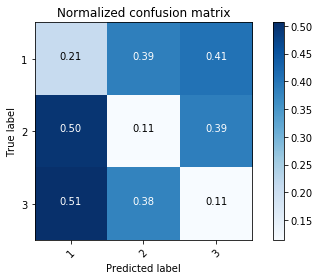

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.1498456790123457


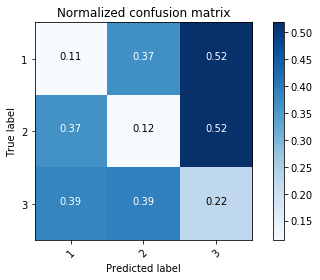

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.14953703703703702


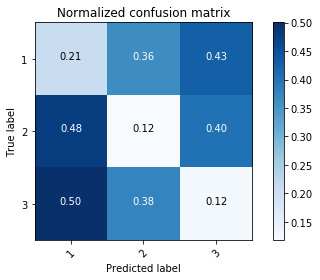

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.1486111111111111


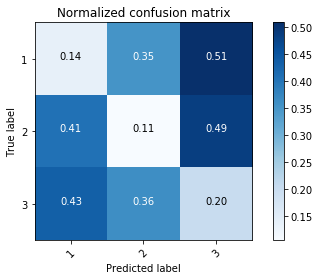

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.14891975308641975


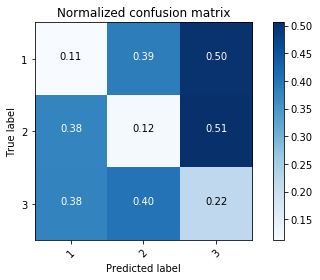

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.1521604938271605


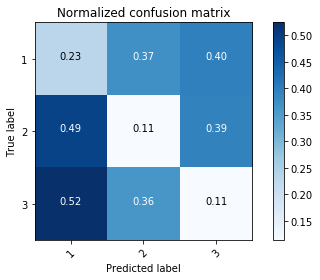

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.15540123456790123


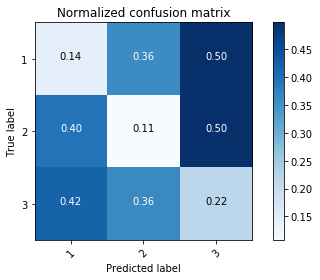

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.1507716049382716


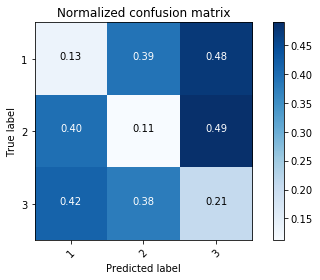

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.1478395061728395


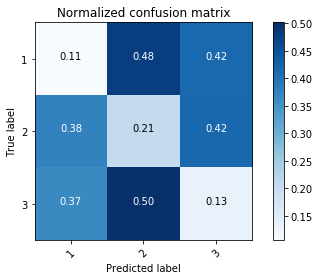

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.15601851851851853


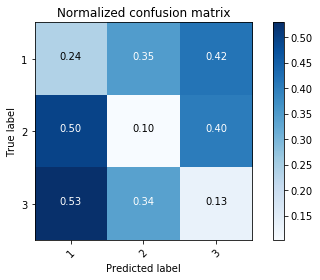

In [27]:
for i in range(5):
    for train_index, test_index in kf.split(nursery):
        X_train, X_test = data_nursery.iloc[train_index], data_nursery.iloc[test_index]
        y_train, y_test = labels_nursery[train_index], labels_nursery[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
#         print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Poker Dataset

In [ ]:
for i in range(5):
    for train_index, test_index in kf.split(poker2):
        X_train, X_test = data_poker.iloc[train_index], data_poker.iloc[test_index]
        y_train, y_test = labels_poker[train_index], labels_poker[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

## SVM for Market

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         2.0       0.91      1.00      0.95      3131
         1.0       1.00      0.02      0.05       205
         3.0       0.00      0.00      0.00       102

   micro avg       0.91      0.91      0.91      3438
   macro avg       0.64      0.34      0.33      3438
weighted avg       0.89      0.91      0.87      3438

accuracy:  0.9121582315299592


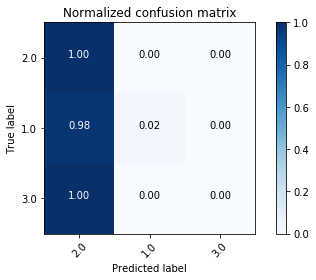

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         3.0       0.92      1.00      0.96      3151
         1.0       1.00      0.02      0.04       196
         2.0       0.00      0.00      0.00        91

   micro avg       0.92      0.92      0.92      3438
   macro avg       0.64      0.34      0.33      3438
weighted avg       0.90      0.92      0.88      3438

accuracy:  0.9176847004072135


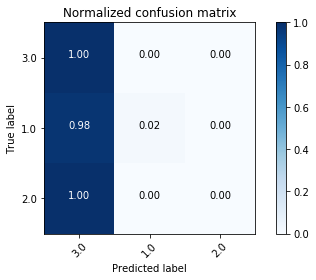

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         3.0       0.91      1.00      0.95      3124
         1.0       1.00      0.01      0.03       212
         2.0       0.00      0.00      0.00       102

   micro avg       0.91      0.91      0.91      3438
   macro avg       0.64      0.34      0.33      3438
weighted avg       0.89      0.91      0.87      3438

accuracy:  0.9095404304828388


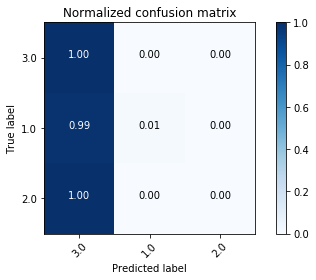

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         3.0       0.92      1.00      0.96      3158
         1.0       1.00      0.03      0.05       189
         2.0       1.00      0.01      0.02        91

   micro avg       0.92      0.92      0.92      3438
   macro avg       0.97      0.35      0.34      3438
weighted avg       0.93      0.92      0.88      3438

accuracy:  0.9203025014543339


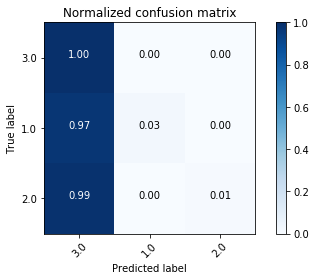

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         3.0       0.92      1.00      0.96      3155
         1.0       1.00      0.01      0.02       191
         2.0       0.00      0.00      0.00        92

   micro avg       0.92      0.92      0.92      3438
   macro avg       0.64      0.34      0.33      3438
weighted avg       0.90      0.92      0.88      3438

accuracy:  0.9182664339732403


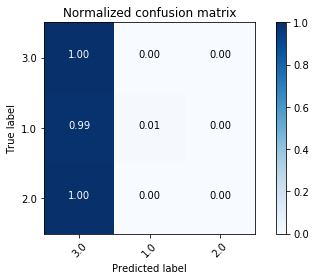

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         3.0       0.91      1.00      0.95      3127
         1.0       1.00      0.01      0.02       210
         2.0       1.00      0.01      0.02       101

   micro avg       0.91      0.91      0.91      3438
   macro avg       0.97      0.34      0.33      3438
weighted avg       0.92      0.91      0.87      3438

accuracy:  0.910413030831879


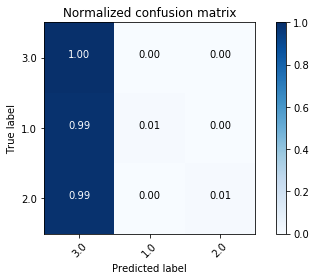

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         3.0       0.92      1.00      0.96      3146
         1.0       1.00      0.02      0.04       197
         2.0       1.00      0.01      0.02        95

   micro avg       0.92      0.92      0.92      3438
   macro avg       0.97      0.34      0.34      3438
weighted avg       0.92      0.92      0.88      3438

accuracy:  0.91652123327516


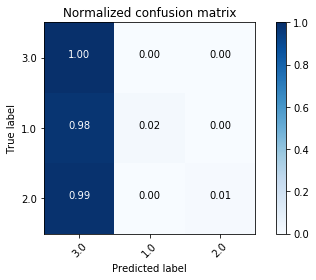

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         2.0       0.91      1.00      0.95      3136
         1.0       1.00      0.01      0.03       204
         3.0       0.00      0.00      0.00        98

   micro avg       0.91      0.91      0.91      3438
   macro avg       0.64      0.34      0.33      3438
weighted avg       0.89      0.91      0.87      3438

accuracy:  0.9130308318789995


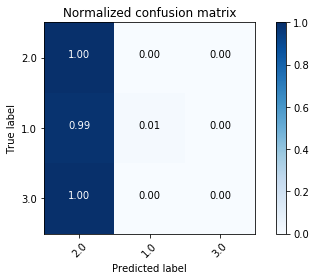

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         3.0       0.91      1.00      0.95      3133
         1.0       1.00      0.02      0.04       205
         2.0       1.00      0.01      0.02       100

   micro avg       0.91      0.91      0.91      3438
   macro avg       0.97      0.34      0.34      3438
weighted avg       0.92      0.91      0.87      3438

accuracy:  0.912739965095986


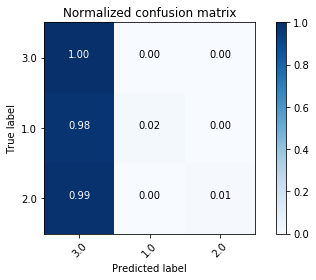

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         2.0       0.92      1.00      0.96      3149
         1.0       1.00      0.02      0.04       196
         3.0       0.00      0.00      0.00        93

   micro avg       0.92      0.92      0.92      3438
   macro avg       0.64      0.34      0.33      3438
weighted avg       0.90      0.92      0.88      3438

accuracy:  0.9171029668411868


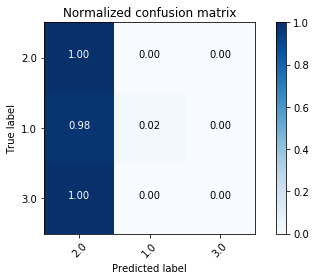

In [28]:
for i in range(5):
    for train_index, test_index in kf.split(market):
        X_train, X_test = data_market.iloc[train_index], data_market.iloc[test_index]
        y_train, y_test = labels_market[train_index], labels_market[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        svm = SVC()
        svm.fit(X_train, y_train)
        predicted = svm.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()